# Code for plotting Power ROIs in 3D space

Example output image:

<img src="example.png">

In [37]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

def get_ROI_centers(data):
    # returns center coordinates for Power ROIs
    
    #make coordinates integers
    coords = np.rint(data)
    coords = coords/3 # to account for 3mm resolution of fMRI
    #shift so no negative coordinates
    coords[:,0] = coords[:,0] - (np.min(coords[:,0]) -1)
    coords[:,1] = coords[:,1] - (np.min(coords[:,1]) -1)
    coords[:,2] = coords[:,2] - (np.min(coords[:,2]) -1)
    coords = coords.astype(int)
    return coords

def get_full_ROI_space(coords):
    # returns coordinates for filled Power ROIs
    # each ROI corresponds to 19 values
    
    corners = [0,2,6,8,18,20,24,26]
    new_coords = np.zeros((0,3))
    for i in range(0, coords.shape[0]):
        Xvals = np.array(range(coords[i,0]-1, coords[i,0]+2))
        Yvals = np.array(range(coords[i,1]-1, coords[i,1]+2))
        Zvals = np.array(range(coords[i,2]-1, coords[i,2]+2))
        # fill in 3D cube around ROI
        C = np.stack(np.meshgrid(Xvals,Yvals,Zvals),-1).reshape(-1,3)
        C = np.delete(C,corners,0) # remove corners
        new_coords = np.append(new_coords,C, axis=0)

    new_coords = new_coords.astype(int)
    return new_coords

def plot_3d_ROIs(coords, scores, filename, single_view = True):
    # plots and saves 3D ROI plot of scores values on coords
    # can return single view plot or 3 rotated views plot
    
    if single_view:
        ax = plt.axes(projection='3d')
        ax.grid = (False)
        ax.axis('off')
        ax.scatter3D(coords[:,0],coords[:,1],coords[:,2],c = scores, cmap = 'Spectral_r',marker='o')
        
    else:
        fig = plt.figure(figsize = (12,3)) #plt.figaspect(0.3)
        ax = fig.add_subplot(1,3,1,projection="3d")
        ax.grid = (False)
        ax.axis('off')
        ax.scatter3D(coords[:,0], coords[:,1],coords[:,2],c = scores, cmap = 'Spectral_r',marker = 's')

        ax = fig.add_subplot(1,3,2,projection="3d")
        ax.grid = (False)
        ax.axis('off')
        ax.view_init(azim=30)
        ax.scatter3D(coords[:,0], coords[:,1],coords[:,2],c = scores, cmap = 'Spectral_r',marker = 's')

        ax = fig.add_subplot(1,3,3,projection="3d")
        ax.grid = (False)
        ax.axis('off')
        ax.view_init(azim = 60)
        ax.scatter3D(coords[:,0], coords[:,1],coords[:,2],c = scores, cmap = 'Spectral_r',marker = 's')

    plt.savefig(filename, dpi = 600)
    plt.show()
    plt.close()

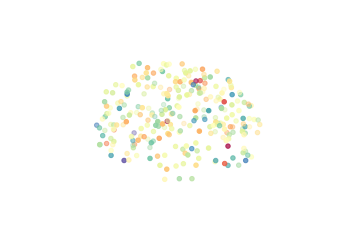

In [38]:
# read in coordinate data for Power Parcellation
data = np.loadtxt(open('PowerParcellation_coordinates_networklabels.csv','rb'), 
                  delimiter=",",usecols = (1,2,3), skiprows=1)

# coords contains x,y,z coordinates for each ROI center
coords = get_ROI_centers(data)

# full_coords will fill ROI completely in brain space
# here each ROI maps to 19 x,y,z coordinates
full_coords = get_full_ROI_space(coords)

# here you would read in your scores that correspond to the coloring of each ROI
# must be in order of ROIs in the timeseries files
# if using full_coords, do scores = np.repeat(scores, 19)
scores = np.random.randn(coords.shape[0])

# if you want to change the marker shape, size or the colormap you can do so in the function above
plot_3d_ROIs(coords, scores, "test.png", True)

